In [1]:
#run this once per kernal crash
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get install libpython3.6-dev

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/hsimple.root  
   creating: root_build/tutorials/gui/
  inflating: root_build/tutorials/gui/iconAsXPMData.C  
  inflating: root_build/tutorials/gui/splitterVertical.C  
  inflating: root_build/tutorials/gui/guitest_playback.C  
  inflating: root_build/tutorials/gui/customTH1Fmenu.C  
  inflating: root_build/tutorials/gui/worldmap.jpg  
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutori

In [2]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-10 22:39:13--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.83, 91.189.91.81, 185.125.190.36, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  --.-KB/s    in 0.09s   

2024-03-10 22:39:13 (14.7 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121899 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-l

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')


<CDLL '/content/root_build/lib//libTreePlayer.so', handle 5cff09a8f0d0 at 0x79cb9a87acb0>

In [ ]:
#Now we can check if we have everything working as we expect:
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

In [4]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2024-03-10 22:39:14--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  30.0MB/s    in 22s     

2024-03-10 22:39:36 (29.1 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



In [7]:
pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 49.2 MB/s eta 0:00:00


In [9]:
import uproot
import numpy as np
events = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
tree = events["DecayTree"]

# Daughter particle 1
H1momentum_x = tree.arrays(["H1_PX"], library="np") # x direction
H1momentum_y = tree.arrays(["H1_PY"], library="np") # y direction
H1momentum_z = tree.arrays(["H1_PZ"], library="np") # z direction
total_momentumH1 = []

for i in range(len(H1momentum_x['H1_PX'])):
    total_momentumH1.append(np.sqrt(H1momentum_x["H1_PX"][i]**2 + H1momentum_y["H1_PY"][i]**2 + H1momentum_z["H1_PZ"][i]**2))
total_momentumH1 = np.array(total_momentumH1)

# Daughter particle 2
H2momentum_x = tree.arrays(["H2_PX"], library="np") # x direction
H2momentum_y = tree.arrays(["H2_PY"], library="np") # y direction
H2momentum_z = tree.arrays(["H2_PZ"], library="np") # z direction
total_momentumH2 = []
for i in range(len(H2momentum_x['H2_PX'])):
    total_momentumH2.append(np.sqrt(H2momentum_x["H2_PX"][i]**2 + H2momentum_y["H2_PY"][i]**2 + H2momentum_z["H2_PZ"][i]**2))
total_momentumH2 = np.array(total_momentumH2)

# Daughter particle 3
H3momentum_x = tree.arrays(["H3_PX"], library="np") # x direction
H3momentum_y = tree.arrays(["H3_PY"], library="np") # y direction
H3momentum_z = tree.arrays(["H3_PZ"], library="np") # z direction
total_momentumH3 = []
for i in range(len(H3momentum_x['H3_PX'])):
    total_momentumH3.append(np.sqrt(H3momentum_x["H3_PX"][i]**2 + H3momentum_y["H3_PY"][i]**2 + H3momentum_z["H3_PZ"][i]**2))
total_momentumH3 = np.array(total_momentumH3)



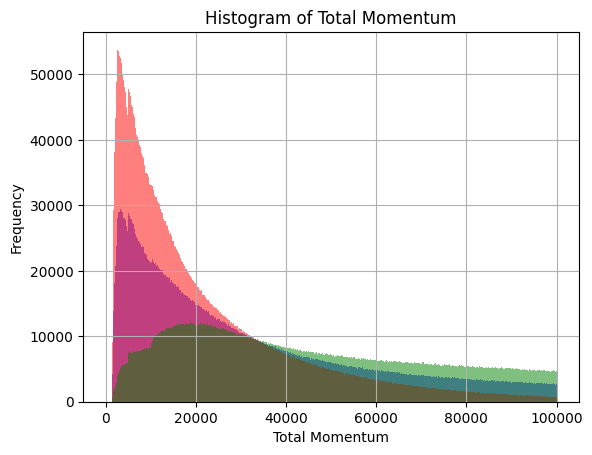

In [11]:
# Plot histogram of total momentum
import matplotlib.pyplot as plt
plt.hist(total_momentumH1, bins=500, color='blue', alpha=0.5, range= (0,10e4))
plt.hist(total_momentumH2, bins=500, color='red', alpha=0.5, range= (0,10e4))
plt.hist(total_momentumH3, bins=500, color='green', alpha=0.5, range= (0,10e4))
plt.xlabel('Total Momentum')
plt.ylabel('Frequency')
plt.title('Histogram of Total Momentum')
plt.grid(True)
plt.show()



In [12]:
# Calculating momentum of mother particle
# Due to conservation of momentum we sum up all the daughter momenta to get the mother momenta(summing all components)
# Total x-direction
total_momentumx = []
for i in range(len(H1momentum_x['H1_PX'])):
    total_momentumx.append(H1momentum_x["H1_PX"][i] + H2momentum_x["H2_PX"][i] + H3momentum_x["H3_PX"][i])
total_momentumx = np.array(total_momentumx)

# Total y-direction
total_momentumy = []
for i in range(len(H1momentum_y['H1_PY'])):
    total_momentumy.append(H1momentum_y["H1_PY"][i] + H2momentum_y["H2_PY"][i] + H3momentum_y["H3_PY"][i])
total_momentumy = np.array(total_momentumy)

# Total z-direction
total_momentumz = []
for i in range(len(H1momentum_z['H1_PZ'])):
    total_momentumz.append(H1momentum_z["H1_PZ"][i] + H2momentum_z["H2_PZ"][i] + H3momentum_z["H3_PZ"][i])
total_momentumz = np.array(total_momentumz)

# Mother particle
mother_momentum = []
for i in range(len(H3momentum_x['H3_PX'])):
    mother_momentum.append(np.sqrt(total_momentumx[i]**2 + total_momentumy[i]**2 + total_momentumz[i]**2))
mother_momentum = np.array(mother_momentum)


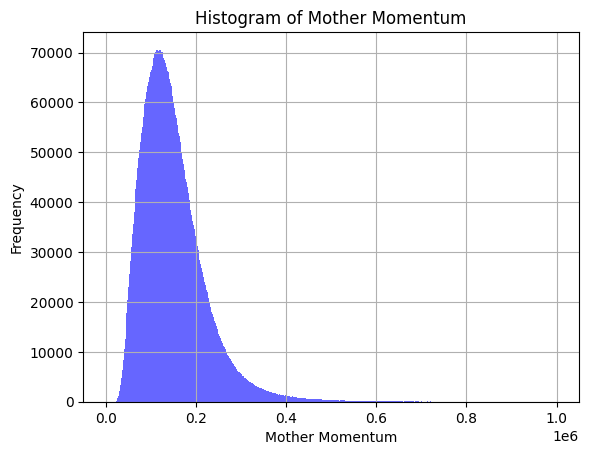

In [13]:
# Plot histogram of mother momentum
plt.hist(mother_momentum, bins=500, color='blue', alpha=0.6, range= (0,10e5))
plt.xlabel('Mother Momentum')
plt.ylabel('Frequency')
plt.title('Histogram of Mother Momentum')
plt.grid(True)
plt.show()

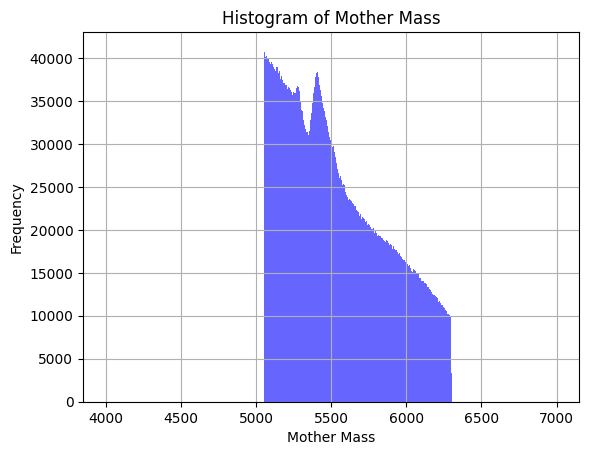

In [14]:
# Getting mass of mother particle
# Charged B meson mass: 5279.34 MeV/c^2
m_k = 493.677 # Charged kaon mass: 493.677 MeV/c^2

# Calculating energy of daughter particles
EH1 = [] # energy daughter particle H1
EH2 = []
EH3 = []
for i in range(len(total_momentumH1)):
  EH1.append(np.sqrt(total_momentumH1[i]**2 + m_k**2))
  EH2.append(np.sqrt(total_momentumH2[i]**2 + m_k**2))
  EH3.append(np.sqrt(total_momentumH3[i]**2 + m_k**2))

EH1 = np.array(EH1)
EH2 = np.array(EH2)
EH2 = np.array(EH2)

# Energy of mother particle(Energy Conservation)
EHM = EH1 + EH2 + EH3 # energy of mother

mother_mass = []
for i in range(len(EHM)):
  mother_mass.append(np.sqrt(EHM[i]**2-mother_momentum[i]**2))
mother_mass = np.array(mother_mass)

#Histogram of mother mass
plt.hist(mother_mass, bins=500, color='blue', alpha=0.6, range= (4000,7000))
plt.xlabel('Mother Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mother Mass')
plt.grid(True)
plt.show()
# Comparing this to the actual value we see that the distribution is around  5279.34 MeV/c^2 which is the actual mass of the B meson

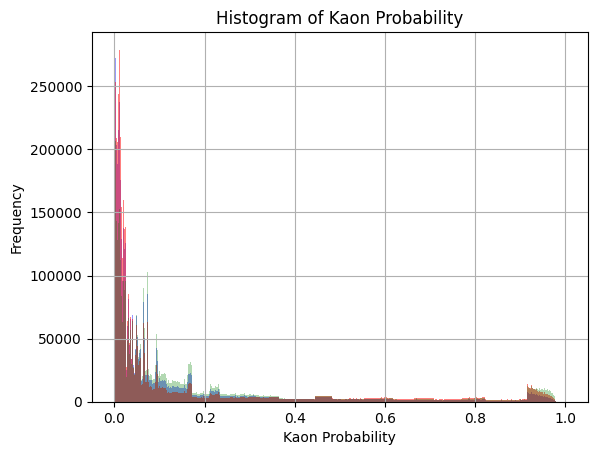

In [15]:
#Make plots of H1/H2/H3 _ProbK on one plot
# Particle probability of bieng Kaon
H1_ProbK = tree.arrays(["H1_ProbK"], library="np")
H2_ProbK = tree.arrays(["H2_ProbK"], library="np")
H3_ProbK = tree.arrays(["H3_ProbK"], library="np")

# Plot histogram of Particle probability
plt.hist(H1_ProbK["H1_ProbK"], bins=500, color='blue', alpha=0.4, range= (0,1))
plt.hist(H2_ProbK["H2_ProbK"], bins=500, color='red', alpha=0.5, range= (0,1))
plt.hist(H3_ProbK["H3_ProbK"], bins=500, color='green', alpha=0.3, range= (0,1))
plt.xlabel('Kaon Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Kaon Probability')
plt.grid(True)
plt.show()

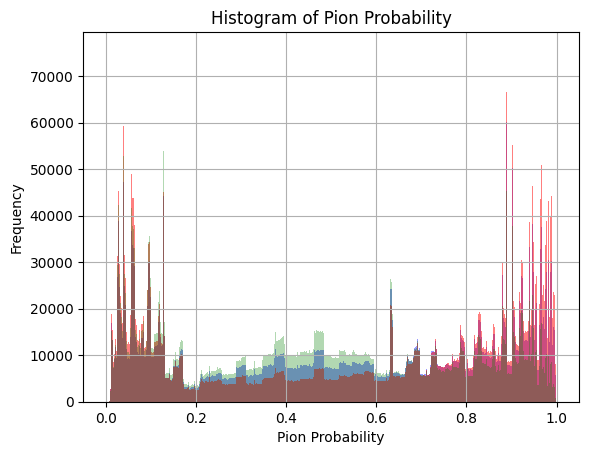

In [16]:
#Make plots of H1/H2/H3 _ProbPi on one plot
# Particle provavility of bieng pion
H1_ProbPi = tree.arrays(["H1_ProbPi"], library="np")
H2_ProbPi = tree.arrays(["H2_ProbPi"], library="np")
H3_ProbPi = tree.arrays(["H3_ProbPi"], library="np")

# Plot histogram of Particle probability
plt.hist(H1_ProbPi["H1_ProbPi"], bins=500, color='blue', alpha=0.4, range= (0,1))
plt.hist(H2_ProbPi["H2_ProbPi"], bins=500, color='red', alpha=0.5, range= (0,1))
plt.hist(H3_ProbPi["H3_ProbPi"], bins=500, color='green', alpha=0.3, range= (0,1))
plt.xlabel('Pion Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Pion Probability')
plt.grid(True)
plt.show()

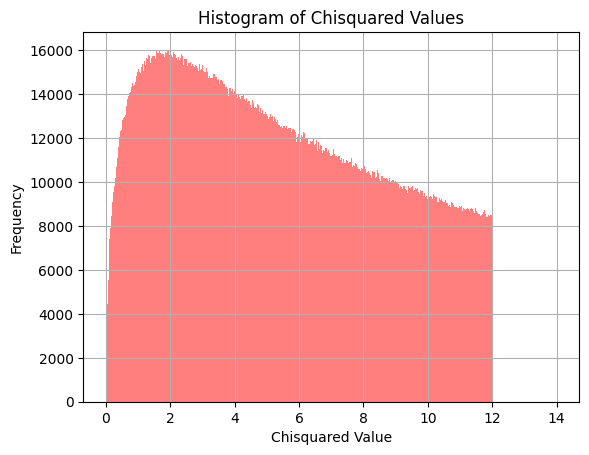

In [17]:
#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = tree.arrays(["B_VertexChi2"], library="np")

# Plitting chi safasf
plt.hist(B_VertexChi2["B_VertexChi2"], bins=500, color='red', alpha=0.5, range= (0,14))
plt.xlabel('Chisquared Value')
plt.ylabel('Frequency')
plt.title('Histogram of Chisquared Values')
plt.grid(True)
plt.show()

In [18]:
# Selection (Probability of kaon greater than 60% for each daughter particle, no muons, and chi sqaured of B vertex less than 6)
selection = "H1_ProbK > 0.6 && H2_ProbK > 0.6 && H3_ProbK > 0.6 && !H1_isMuon && !H2_isMuon && !H3_isMuon && B_VertexChi2 < 6"

# Open the root file and get the TTree
events = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root")
tree = events.Get("DecayTree")

# Create a new file to store the filtered TTree
output_file = ROOT.TFile("mynewfile.root", "RECREATE")

# Create a clone of the original TTree with only the selected entries
cut_tree = tree.CopyTree(selection)

# Write the cloned TTree to the output file
cut_tree.Write()

# Close the output file
output_file.Close()


In [20]:
# Open the ROOT file and get the TTree
events = uproot.open("mynewfile.root")
tree = events["DecayTree"]

# Daughter particle 1
H1momentum_x = tree.arrays(["H1_PX"], library="np") # x direction
H1momentum_y = tree.arrays(["H1_PY"], library="np") # y direction
H1momentum_z = tree.arrays(["H1_PZ"], library="np") # z direction
total_momentumH1 = []

for i in range(len(H1momentum_x['H1_PX'])):
    total_momentumH1.append(np.sqrt(H1momentum_x["H1_PX"][i]**2 + H1momentum_y["H1_PY"][i]**2 + H1momentum_z["H1_PZ"][i]**2))
total_momentumH1 = np.array(total_momentumH1)

# Daughter particle 2
H2momentum_x = tree.arrays(["H2_PX"], library="np") # x direction
H2momentum_y = tree.arrays(["H2_PY"], library="np") # y direction
H2momentum_z = tree.arrays(["H2_PZ"], library="np") # z direction
total_momentumH2 = []
for i in range(len(H2momentum_x['H2_PX'])):
    total_momentumH2.append(np.sqrt(H2momentum_x["H2_PX"][i]**2 + H2momentum_y["H2_PY"][i]**2 + H2momentum_z["H2_PZ"][i]**2))
total_momentumH2 = np.array(total_momentumH2)

# Daughter particle 3
H3momentum_x = tree.arrays(["H3_PX"], library="np") # x direction
H3momentum_y = tree.arrays(["H3_PY"], library="np") # y direction
H3momentum_z = tree.arrays(["H3_PZ"], library="np") # z direction
total_momentumH3 = []
for i in range(len(H3momentum_x['H3_PX'])):
    total_momentumH3.append(np.sqrt(H3momentum_x["H3_PX"][i]**2 + H3momentum_y["H3_PY"][i]**2 + H3momentum_z["H3_PZ"][i]**2))
total_momentumH3 = np.array(total_momentumH3)

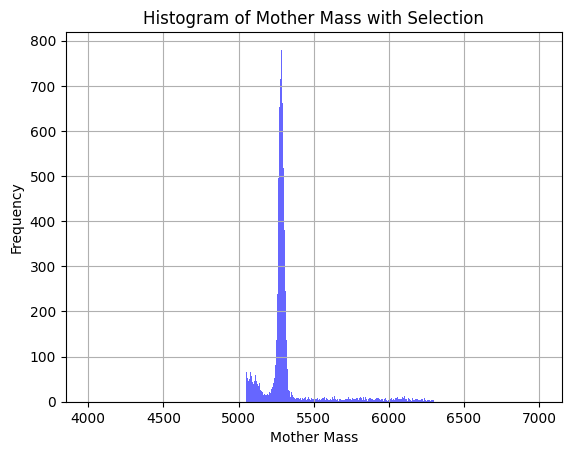

In [21]:
# Due to conservation of momentum we sum up all the daughter momenta to get the mother momenta(summing all components)
# Total x-direction
total_momentumx = []
for i in range(len(H1momentum_x['H1_PX'])):
    total_momentumx.append(H1momentum_x["H1_PX"][i] + H2momentum_x["H2_PX"][i] + H3momentum_x["H3_PX"][i])
total_momentumx = np.array(total_momentumx)

# Total y-direction
total_momentumy = []
for i in range(len(H1momentum_y['H1_PY'])):
    total_momentumy.append(H1momentum_y["H1_PY"][i] + H2momentum_y["H2_PY"][i] + H3momentum_y["H3_PY"][i])
total_momentumy = np.array(total_momentumy)

# Total z-direction
total_momentumz = []
for i in range(len(H1momentum_z['H1_PZ'])):
    total_momentumz.append(H1momentum_z["H1_PZ"][i] + H2momentum_z["H2_PZ"][i] + H3momentum_z["H3_PZ"][i])
total_momentumz = np.array(total_momentumz)

# Mother particle
mother_momentum = []
for i in range(len(H3momentum_x['H3_PX'])):
    mother_momentum.append(np.sqrt(total_momentumx[i]**2 + total_momentumy[i]**2 + total_momentumz[i]**2))
mother_momentum = np.array(mother_momentum)

# Charged B meson mass: 5279.34 MeV/c^2
m_k = 493.677 # Charged kaon mass: 493.677 MeV/c^2

# Calculating energy of daughter particles
EH1 = [] # energy daughret 1
EH2 = []
EH3 = []
for i in range(len(total_momentumH1)):
  EH1.append(np.sqrt(total_momentumH1[i]**2 + m_k**2))
  EH2.append(np.sqrt(total_momentumH2[i]**2 + m_k**2))
  EH3.append(np.sqrt(total_momentumH3[i]**2 + m_k**2))

EH1 = np.array(EH1)
EH2 = np.array(EH2)
EH2 = np.array(EH2)


# Energy of mother particle(Energy Conservation)
EHM = EH1 + EH2 + EH3 # energy of mother

mother_mass = []
for i in range(len(EHM)):
  mother_mass.append(np.sqrt(EHM[i]**2-mother_momentum[i]**2))
mother_mass = np.array(mother_mass)


#Histogram of mother mass
plt.hist(mother_mass, bins=500, color='blue', alpha=0.6, range= (4000,7000))
plt.xlabel('Mother Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mother Mass with Selection')
plt.grid(True)
plt.show()
# We see that after the selection the histrogram of the mass of the mother particle has a much clearer distribution around 5279.34 MeV/c^2, the actual B meson mass

In [23]:
from scipy.optimize import curve_fit

bin_contents, bin_edges = np.histogram(mother_mass, bins=500, range=(5100, 5700)) #bin contents is my y values, bin_edges used below
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0 # bin centers are my x values

#define functions
def exp_bgnd(x,eamp, decay):
  return eamp * np.exp(-decay * x)

def gauss_sgnl(x, gamp, sigma, mean):
  return gamp * (np.exp(-(((x - mean)/sigma)**2)/2.0))/(sigma * np.sqrt(2.0*np.pi))

def fitting_function(x, eamp, decay, gamp, sigma, mean):
  return exp_bgnd(x, eamp, decay) + gauss_sgnl(x, gamp, sigma, mean)

vars_guess = [50, 1e-4, 500, 5, 5300]

# returns the optimized variables used later for fitting

vars_fit, pcov = curve_fit(fitting_function, bin_centers, bin_contents, p0=vars_guess)

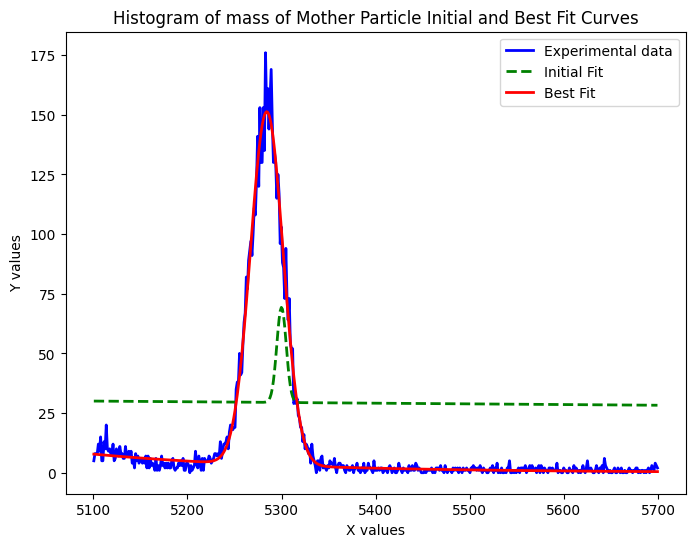

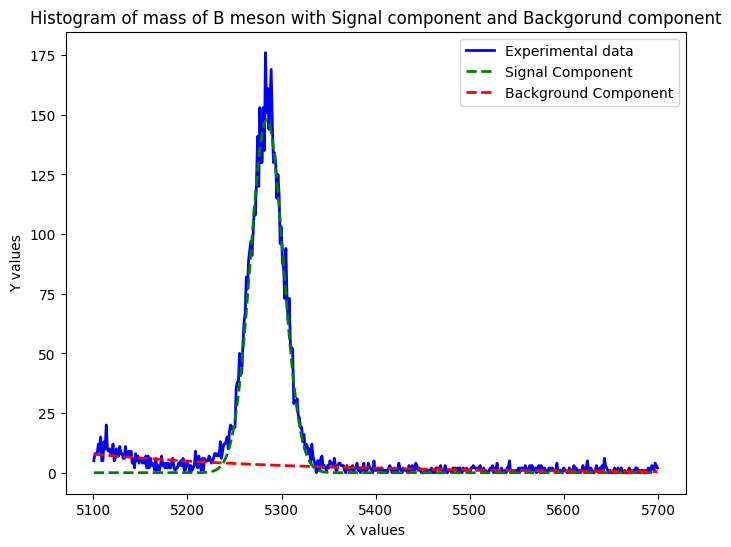

In [26]:
# Initial fit and best fit curves
initial_fit_curve = fitting_function(bin_centers, *vars_guess)
best_fit_curve = fitting_function(bin_centers, *vars_fit)

plt.figure(figsize=(8, 6))

# Mass plot
plt.plot(bin_centers, bin_contents, color='blue', linestyle='-', linewidth=2, label='Experimental data')

# Initial fit curve
plt.plot(bin_centers, initial_fit_curve, color='green', linestyle='--', linewidth=2, label='Initial Fit')

# Best fit curve
plt.plot(bin_centers, best_fit_curve, color='red', linestyle='-', linewidth=2, label='Best Fit')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of Mother Particle Initial and Best Fit Curves')
plt.legend()
plt.show()

# Background
signal_component = gauss_sgnl(bin_centers, *vars_fit[2:])
background_component = exp_bgnd(bin_centers, *vars_fit[:2])
plt.figure(figsize=(8, 6))

# plot the mass
plt.plot(bin_centers, bin_contents, color='blue', linestyle='-', linewidth=2, label='Experimental data')

# Gaussian component
plt.plot(bin_centers, signal_component, color='green', linestyle='dashed', linewidth=2, label='Signal Component')

# Exponential component
plt.plot(bin_centers, background_component, color='red', linestyle='dashed', linewidth=2, label='Background Component')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of B meson with Signal component and Backgorund component')
plt.legend()
plt.show()


In [27]:
# Diff of observed and expected values
residuals = bin_contents - best_fit_curve

# Chi-square value
chi_square = np.sum((residuals / best_fit_curve)**2)
print("Chi-square value:", chi_square)

Chi-square value: 679.3759859195991


In [28]:
from scipy.integrate import simps
# integrate the signal over a range  of (5100, 5700)
signal_events = simps(signal_component, bin_centers)

print("Number of signal events:", signal_events)

Number of signal events: 6431.043075807312


In [29]:

# apply another selection for positive charged meson and negative charged meson

selection_minus=("(H1_ProbK>0.6)&(H2_ProbK>0.6)&(H3_ProbK>0.6)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)&(B_VertexChi2<6)&(H1_Charge+H2_Charge+H3_Charge==-1)")
selection_plus=("(H1_ProbK>0.6)&(H2_ProbK>0.6)&(H3_ProbK>0.6)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)&(B_VertexChi2<6)&(H1_Charge+H2_Charge+H3_Charge==1)")

cuttree_minus = events["DecayTree"].arrays(cut=selection_minus)
cuttree_plus = events["DecayTree"].arrays(cut=selection_plus)


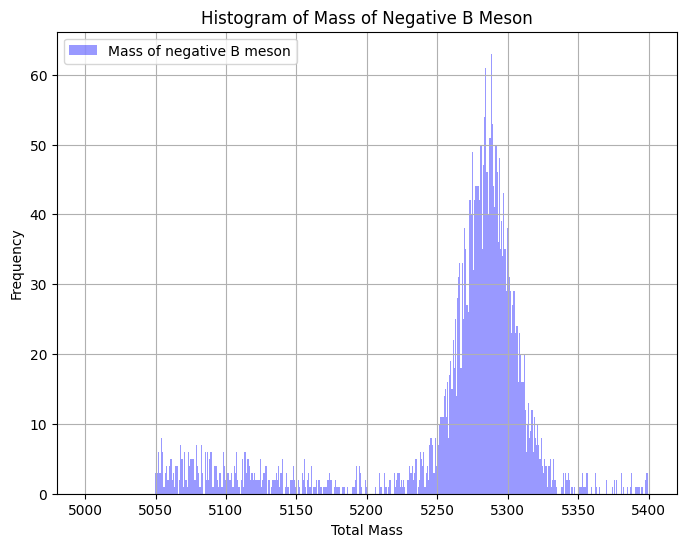

In [31]:
# defining everything again

Cmomentum_minus_px1 = np.array([entry["H1_PX"] for entry in cuttree_minus])

Cmomentum_minus_py1 = np.array([entry["H1_PY"] for entry in cuttree_minus])

Cmomentum_minus_pz1 = np.array([entry["H1_PZ"] for entry in cuttree_minus])

Cmomentum_minus_px2 = np.array([entry["H2_PX"] for entry in cuttree_minus])

Cmomentum_minus_py2 = np.array([entry["H2_PY"] for entry in cuttree_minus])

Cmomentum_minus_pz2 = np.array([entry["H2_PZ"] for entry in cuttree_minus])

Cmomentum_minus_px3 = np.array([entry["H3_PX"] for entry in cuttree_minus])

Cmomentum_minus_py3 = np.array([entry["H3_PY"] for entry in cuttree_minus])

Cmomentum_minus_pz3 = np.array([entry["H3_PZ"] for entry in cuttree_minus])

# calculate the total Cmomentum_minus of daughters
tot_Cmomentum_minus1 = []
tot_Cmomentum_minus2 = []
tot_Cmomentum_minus3 = []
for i in range(len(Cmomentum_minus_px1)):
    tot_Cmomentum_minus1.append(np.sqrt((Cmomentum_minus_px1[i])**2 + (Cmomentum_minus_py1[i])**2 + (Cmomentum_minus_pz1[i])**2))
for i in range(len(Cmomentum_minus_px2)):
    tot_Cmomentum_minus2.append(np.sqrt((Cmomentum_minus_px2[i])**2 + (Cmomentum_minus_py2[i])**2 + (Cmomentum_minus_pz2[i])**2))
for i in range(len(Cmomentum_minus_px3)):
    tot_Cmomentum_minus3.append(np.sqrt((Cmomentum_minus_px3[i])**2 + (Cmomentum_minus_py3[i])**2 + (Cmomentum_minus_pz3[i])**2))

# define the mass of daughters

m_daughter = 493.677 #same massfor both K+ and K-, expressed in MeV/c^2

# calculate the Cenergy_minus of daughters
Cenergy_minus_daughter1 = []
Cenergy_minus_daughter2 = []
Cenergy_minus_daughter3 = []

for i in range (len(tot_Cmomentum_minus1)):
    Cenergy_minus_daughter1.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_minus1[i] ** 2))
    Cenergy_minus_daughter2.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_minus2[i] ** 2))
    Cenergy_minus_daughter3.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_minus3[i] ** 2))

Cenergy_minus_daughter1 = np.array(Cenergy_minus_daughter1)
Cenergy_minus_daughter2 = np.array(Cenergy_minus_daughter2)
Cenergy_minus_daughter3 = np.array(Cenergy_minus_daughter3)

# define the Cenergy_minus of the mother as the sum of energies of the daughters

Cenergy_minus_mother = Cenergy_minus_daughter1 + Cenergy_minus_daughter2 + Cenergy_minus_daughter3

# calculate the total Cmomentum_minus of the mother

totx_Cmomentum_minus = []
toty_Cmomentum_minus = []
totz_Cmomentum_minus = []


for i in range(len(Cmomentum_minus_px1)):
    totx_Cmomentum_minus.append(Cmomentum_minus_px1[i]+Cmomentum_minus_px2[i]+Cmomentum_minus_px3[i])
    toty_Cmomentum_minus.append(Cmomentum_minus_py1[i]+Cmomentum_minus_py2[i]+Cmomentum_minus_py3[i])
    totz_Cmomentum_minus.append(Cmomentum_minus_pz1[i]+Cmomentum_minus_pz2[i]+Cmomentum_minus_pz3[i])

mother_Cmomentum_minus=[]

for i in range(len(totx_Cmomentum_minus)):
    mother_Cmomentum_minus.append(np.sqrt(totx_Cmomentum_minus[i]**2 + toty_Cmomentum_minus[i]**2 + totz_Cmomentum_minus[i]**2))


# define Cmass_minus of the mother
Cmass_minus_mother = []
for i in range (len(tot_Cmomentum_minus1)):
    Cmass_minus_mother.append(np.sqrt(Cenergy_minus_mother[i] ** 2 - mother_Cmomentum_minus[i] ** 2))
Cmass_minus_mother = np.array(Cmass_minus_mother)

# plot the mass of mother (minus)

plt.figure(figsize=(8, 6))
plt.hist(Cmass_minus_mother, bins=500, color='blue', alpha=0.4, range=(5000, 5400) , label=("Mass of negative B meson"))
plt.xlabel('Total Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mass of Negative B Meson')
plt.grid(True)
plt.legend()
plt.show()


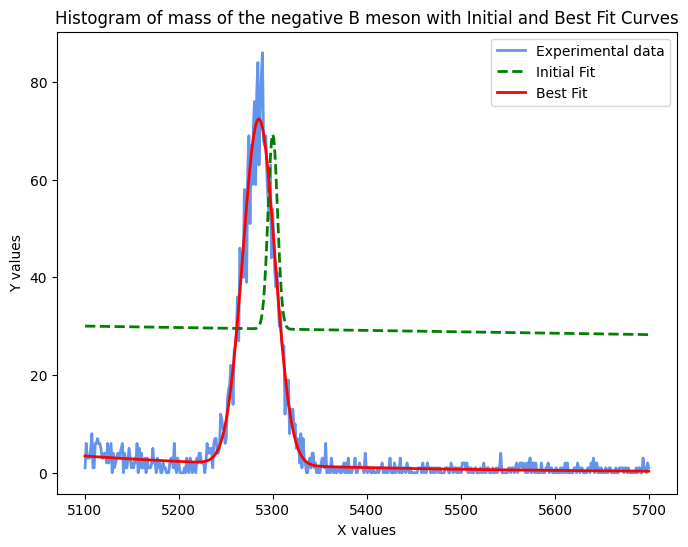

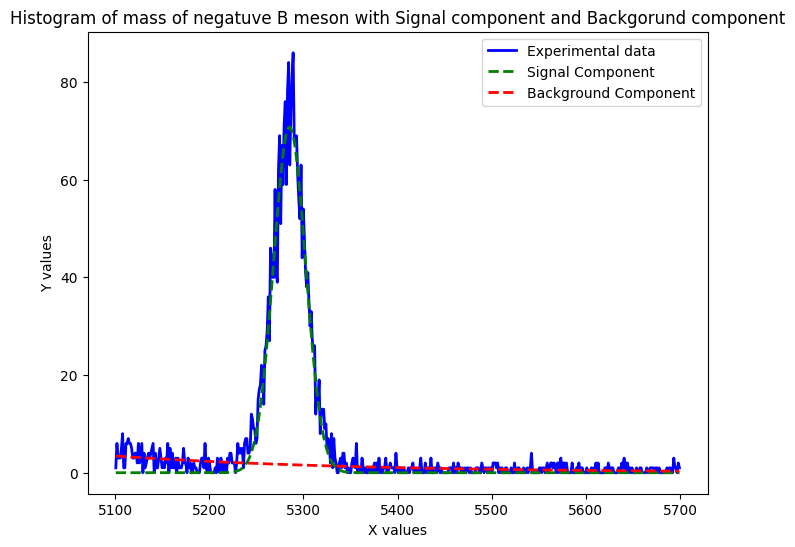

Number of signal events:  3024.282154939341


In [34]:
# fitting again
bin_contents_minus, bin_edges_minus = np.histogram(Cmass_minus_mother, bins=500, range=(5100, 5700))
bin_centers_minus = (bin_edges_minus[:-1] + bin_edges_minus[1:]) / 2.0

# returns the optimized variables used later for fitting
vars_fit_minus, pcov = curve_fit(fitting_function, bin_centers_minus, bin_contents_minus, p0=vars_guess)

# calculate the initial fit and best fit curves
initial_fit_curve_minus = fitting_function(bin_centers_minus, *vars_guess)
best_fit_curve_minus = fitting_function(bin_centers_minus, *vars_fit_minus)
plt.figure(figsize=(8, 6))

# Mass
plt.plot(bin_centers_minus, bin_contents_minus, color='cornflowerblue', linestyle='-', linewidth=2, label='Experimental data')

# Initial fit curve
plt.plot(bin_centers_minus, initial_fit_curve_minus, color='green', linestyle='--', linewidth=2, label='Initial Fit')

# Best fit curve
plt.plot(bin_centers_minus, best_fit_curve_minus, color='red', linestyle='-', linewidth=2, label='Best Fit')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of the negative B meson with Initial and Best Fit Curves')
plt.legend()
plt.show()


# Calculate the Gaussian component (signal) and the exponential component (background)
signal_component_minus = gauss_sgnl(bin_centers_minus, *vars_fit_minus[2:])
background_component_minus = exp_bgnd(bin_centers_minus, *vars_fit_minus[:2])

plt.figure(figsize=(8, 6))
# Plot the mass
plt.plot(bin_centers_minus, bin_contents_minus, color='blue', linestyle='-', linewidth=2, label='Experimental data')

# Plot the Gaussian component (signal)
plt.plot(bin_centers_minus, signal_component_minus, color='green', linestyle='dashed', linewidth=2, label='Signal Component')

# Plot the exponential component (background)
plt.plot(bin_centers_minus, background_component_minus, color='red', linestyle='dashed', linewidth=2, label='Background Component')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of negatuve B meson with Signal component and Backgorund component')
plt.legend()
plt.show()

# Integrate the signal over the range of (5100, 5700)
signal_events_minus = simps(signal_component_minus, bin_centers_minus)
print("Number of signal events: ", signal_events_minus)


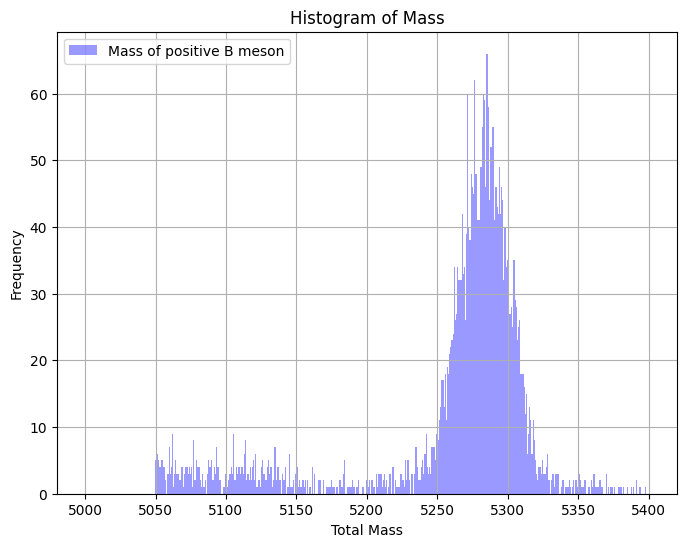

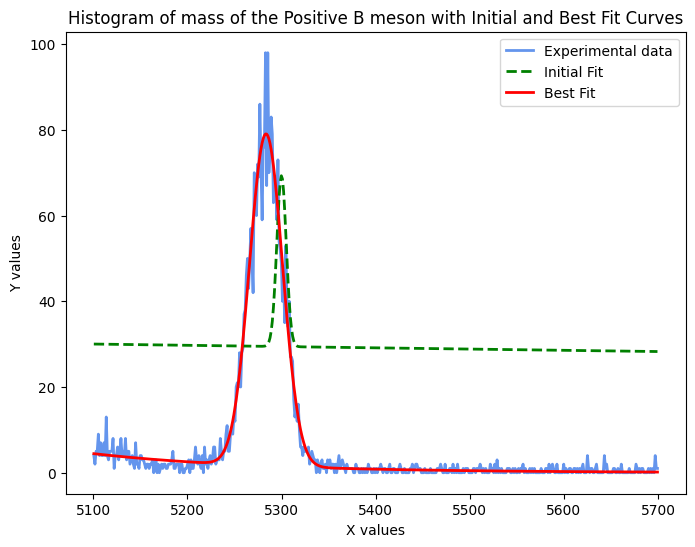

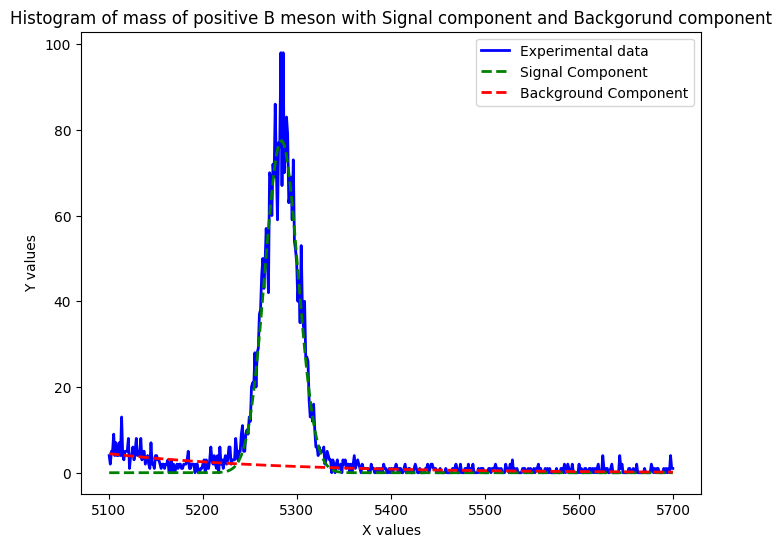

Number of signal events for positive B meson: 3408.1749179285707


In [38]:
# Again but for positive B meson

Cmomentum_plus_px1 = np.array([entry["H1_PX"] for entry in cuttree_plus])

Cmomentum_plus_py1 = np.array([entry["H1_PY"] for entry in cuttree_plus])

Cmomentum_plus_pz1 = np.array([entry["H1_PZ"] for entry in cuttree_plus])

Cmomentum_plus_px2 = np.array([entry["H2_PX"] for entry in cuttree_plus])

Cmomentum_plus_py2 = np.array([entry["H2_PY"] for entry in cuttree_plus])

Cmomentum_plus_pz2 = np.array([entry["H2_PZ"] for entry in cuttree_plus])

Cmomentum_plus_px3 = np.array([entry["H3_PX"] for entry in cuttree_plus])

Cmomentum_plus_py3 = np.array([entry["H3_PY"] for entry in cuttree_plus])

Cmomentum_plus_pz3 = np.array([entry["H3_PZ"] for entry in cuttree_plus])

# calculate the total Cmomentum_plus of daughters
tot_Cmomentum_plus1 = []
tot_Cmomentum_plus2 = []
tot_Cmomentum_plus3 = []
for i in range(len(Cmomentum_plus_px1)):
    tot_Cmomentum_plus1.append(np.sqrt((Cmomentum_plus_px1[i])**2 + (Cmomentum_plus_py1[i])**2 + (Cmomentum_plus_pz1[i])**2))
for i in range(len(Cmomentum_plus_px2)):
    tot_Cmomentum_plus2.append(np.sqrt((Cmomentum_plus_px2[i])**2 + (Cmomentum_plus_py2[i])**2 + (Cmomentum_plus_pz2[i])**2))
for i in range(len(Cmomentum_plus_px3)):
    tot_Cmomentum_plus3.append(np.sqrt((Cmomentum_plus_px3[i])**2 + (Cmomentum_plus_py3[i])**2 + (Cmomentum_plus_pz3[i])**2))

# define the mass of daughters

m_daughter = 493.677 #same massfor both K+ and K-, expressed in MeV/c^2

# calculate the Cenergy_plus of daughters

Cenergy_plus_daughter1 = []
Cenergy_plus_daughter2 = []
Cenergy_plus_daughter3 = []

for i in range (len(tot_Cmomentum_plus1)):
    Cenergy_plus_daughter1.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_plus1[i] ** 2))
    Cenergy_plus_daughter2.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_plus2[i] ** 2))
    Cenergy_plus_daughter3.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_plus3[i] ** 2))

Cenergy_plus_daughter1 = np.array(Cenergy_plus_daughter1)
Cenergy_plus_daughter2 = np.array(Cenergy_plus_daughter2)
Cenergy_plus_daughter3 = np.array(Cenergy_plus_daughter3)

# define the Cenergy_plus of the mother as the sum of energies of the daughters

Cenergy_plus_mother = Cenergy_plus_daughter1 + Cenergy_plus_daughter2 + Cenergy_plus_daughter3

# calculate the total Cmomentum_plus of the mother

totx_Cmomentum_plus = []
toty_Cmomentum_plus = []
totz_Cmomentum_plus = []


for i in range(len(Cmomentum_plus_px1)):
    totx_Cmomentum_plus.append(Cmomentum_plus_px1[i]+Cmomentum_plus_px2[i]+Cmomentum_plus_px3[i])
    toty_Cmomentum_plus.append(Cmomentum_plus_py1[i]+Cmomentum_plus_py2[i]+Cmomentum_plus_py3[i])
    totz_Cmomentum_plus.append(Cmomentum_plus_pz1[i]+Cmomentum_plus_pz2[i]+Cmomentum_plus_pz3[i])

mother_Cmomentum_plus=[]

for i in range(len(totx_Cmomentum_plus)):
    mother_Cmomentum_plus.append(np.sqrt(totx_Cmomentum_plus[i]**2 + toty_Cmomentum_plus[i]**2 + totz_Cmomentum_plus[i]**2))


# define Cmass_plus of the mother
Cmass_plus_mother = []
for i in range (len(tot_Cmomentum_plus1)):
    Cmass_plus_mother.append(np.sqrt(Cenergy_plus_mother[i] ** 2 - mother_Cmomentum_plus[i] ** 2))
Cmass_plus_mother = np.array(Cmass_plus_mother)

# plot the mass of mother (plus)
plt.figure(figsize=(8, 6))
plt.hist(Cmass_plus_mother, bins=500, color='blue', alpha=0.4, range=(5000, 5400) , label=("Mass of positive B meson"))
plt.xlabel('Total Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mass')
plt.grid(True)
plt.legend()
plt.show()

# Fitting again
bin_contents_plus, bin_edges_plus = np.histogram(Cmass_plus_mother, bins=500, range=(5100, 5700))
bin_centers_plus = (bin_edges_plus[:-1] + bin_edges_plus[1:]) / 2.0
vars_fit_plus, pcov = curve_fit(fitting_function, bin_centers_plus, bin_contents_plus, p0=vars_guess)

# Calculate the initial fit and best fit curves
initial_fit_curve_plus = fitting_function(bin_centers_plus, *vars_guess)
best_fit_curve_plus = fitting_function(bin_centers_plus, *vars_fit_plus)
plt.figure(figsize=(8, 6))

# Plot the mass
plt.plot(bin_centers_plus, bin_contents_plus, color='cornflowerblue', linestyle='-', linewidth=2, label='Experimental data')

# Plot the initial fit curve
plt.plot(bin_centers_plus, initial_fit_curve_plus, color='green', linestyle='--', linewidth=2, label='Initial Fit')

# Plot the best fit curve
plt.plot(bin_centers_plus, best_fit_curve_plus, color='red', linestyle='-', linewidth=2, label='Best Fit')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of the Positive B meson with Initial and Best Fit Curves')
plt.legend()
plt.show()

# Background
signal_component_plus = gauss_sgnl(bin_centers_plus, *vars_fit_plus[2:])
background_component_plus = exp_bgnd(bin_centers_plus, *vars_fit_plus[:2])
plt.figure(figsize=(8, 6))

# plot the mass
plt.plot(bin_centers_plus, bin_contents_plus, color='blue', linestyle='-', linewidth=2, label='Experimental data')

# Gaussian component
plt.plot(bin_centers_plus, signal_component_plus, color='green', linestyle='dashed', linewidth=2, label='Signal Component')

# Exponential component
plt.plot(bin_centers_plus, background_component_plus, color='red', linestyle='dashed', linewidth=2, label='Background Component')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of positive B meson with Signal component and Backgorund component')
plt.legend()
plt.show()

# Integrate the signal over the range of (5100, 5700)
signal_events_plus = simps(signal_component_plus, bin_centers_plus)

print("Number of signal events for positive B meson:", signal_events_plus)

In [39]:
# Assymetry
assymetry = (signal_events_minus - signal_events_plus)/(signal_events_minus + signal_events_plus)

uncertainty = np.sqrt((1-assymetry**2)/(signal_events_minus + signal_events_plus))

print('Assymetry between the positive and negative B mesons:' ,assymetry, "with uncertainty:" ,uncertainty)

Assymetry between the positive and negative B mesons: -0.05968057907583843 with uncertainty: 0.012446199046008242
